# Getting started with GeoWombat

This notebook illustrates basic usage of GeoWombat

---

# Imports

In [1]:
%load_ext watermark

In [2]:
import geowombat as gw
from geowombat.data import rgbn

In [3]:
%watermark -a "Woody/non-woody estimates" -d -v -m -p dask,geowombat,numpy,rasterio,xarray -g

Woody/non-woody estimates 2020-03-03 

CPython 3.7.5
IPython 7.9.0

dask 2.11.0
geowombat 1.2.4
numpy 1.18.1
rasterio 1.1.3
xarray 0.15.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-40-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit
Git hash   : fc3d2011f33dd98405f00ce1a864b9d9d8d2a841


# Opening files

Files are opened lazily using `xarray.open_rasterio` as a backend. This means that the data structure is setup as an `xarray.DataArray` with an underlying `dask` array, but data are not loaded upon opening.

## Open a file and explore its properties

In [4]:
with gw.open(rgbn) as src:
    print(src)

<xarray.DataArray (band: 4, y: 403, x: 515)>
dask.array<open_rasterio-d181a5215682e88135827fee81d4354e<this-array>, shape=(4, 403, 515), dtype=uint8, chunksize=(1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
Attributes:
    transform:      (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:            +init=epsg:32618
    res:            (5.0, 5.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    DataType:       Generic
    filename:       /home/mmann1123/anaconda3/envs/geowombat/lib/python3.7/si...
    resampling:     nearest


## Band names

### Specify the names explicitly

In [5]:
with gw.open(rgbn,
             band_names=['blue', 'green', 'red', 'nir']) as src:

    print(src)

<xarray.DataArray (band: 4, y: 403, x: 515)>
dask.array<open_rasterio-d181a5215682e88135827fee81d4354e<this-array>, shape=(4, 403, 515), dtype=uint8, chunksize=(1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U5 'blue' 'green' 'red' 'nir'
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
Attributes:
    transform:      (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:            +init=epsg:32618
    res:            (5.0, 5.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    DataType:       Generic
    filename:       /home/mmann1123/anaconda3/envs/geowombat/lib/python3.7/si...
    resampling:     nearest


### Specify the band names using a context manager

In [6]:
with gw.config.update(sensor='bgrn'):

    with gw.open(rgbn) as src:
        print(src)

<xarray.DataArray (band: 4, y: 403, x: 515)>
dask.array<open_rasterio-d181a5215682e88135827fee81d4354e<this-array>, shape=(4, 403, 515), dtype=uint8, chunksize=(1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U5 'blue' 'green' 'red' 'nir'
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
Attributes:
    transform:      (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:            +init=epsg:32618
    res:            (5.0, 5.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area
    DataType:       Generic
    sensor:         blue, green, red, and NIR
    filename:       /home/mmann1123/anaconda3/envs/geowombat/lib/python3.7/si...
    resampling:     nearest


## Plotting  

### Array plotting `DataArray.plot.imshow()` or `DataArray.gw.imshow()`. The latter is just a wrapper around the former to tidy up the plot axes.

Note that only 1- or 3-band arrays can be plotted

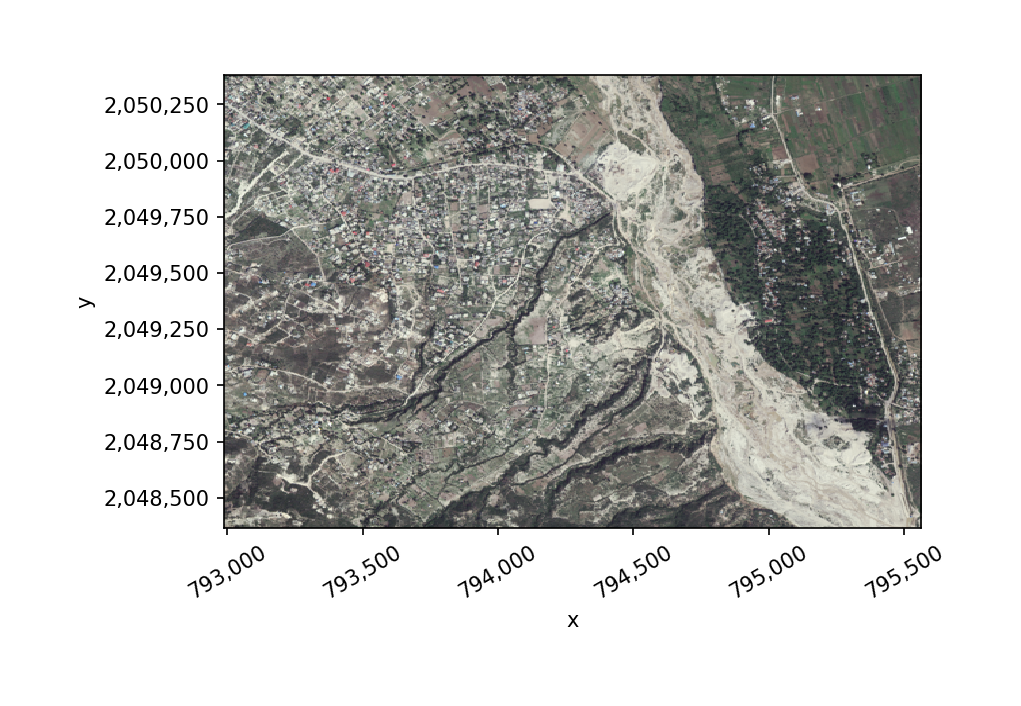

In [7]:
with gw.open(rgbn) as src:
    src.sel(band=[3, 2, 1]).gw.imshow()

Reverse the band order with the `flip` argument.

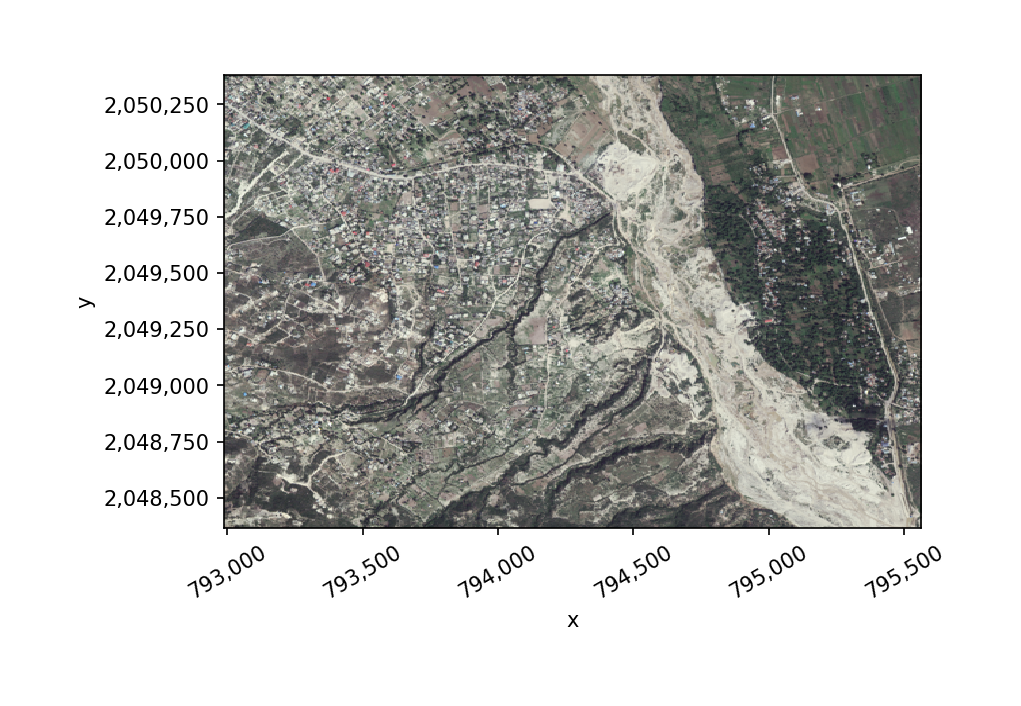

In [8]:
with gw.open(rgbn) as src:
    src.sel(band=[1, 2, 3]).gw.imshow(flip=True)